In [1]:
from data_loader import CustomDataLoader
from torch.utils.data import DataLoader
from inference_utils import get_model, evaluate_model, plot_predictions 

import warnings
warnings.filterwarnings('ignore')

### With only RGB channels

In [2]:
%%time
model_ckpt = './networks/2024_04_16-16_37_36_encoder_efficientnet-b0_weights_imagenet_epochs_100_batchsize_16_lr_0.001/model_0.38835_val_avg.pt'
model, channels = get_model(model_ckpt)

Model parameters:
{'epochs': 100, 'batch_size': 16, 'lr': 0.001, 'encoder': 'efficientnet-b0', 'weights': 'imagenet', 'model_ckpt_path': './networks', 'data_path': '../data_prepped', 'channels': 'r.g.b'}
CPU times: user 593 ms, sys: 213 ms, total: 806 ms
Wall time: 454 ms


In [3]:
# Get the test dataset
data_path = '../denmark_landsat_data'
image_path = data_path + '/{}/img/*'
mask_path = data_path + '/{}/msk/*'
 
# Use custom data loaders for the dataset
test_dataset = CustomDataLoader(image_path.format('test'), mask_path.format('test'), channels = channels)
test_loader = DataLoader(dataset = test_dataset, batch_size = 8, shuffle = False, num_workers = 8)

In [4]:
images, masks, preds = evaluate_model(test_loader, model, thresholds = [0.01, 0.05, 0.1, 0.2, 0.4, 0.8])

100%|█████████████████████████████████████████████████████████████████████████████████| 119/119 [00:08<00:00, 13.94it/s]


0.01 {'iou': 0.843, 'recall': 0.9672, 'precision': 0.8678, 'acc': 0.8549, 'F1': 0.9148, 'kappa': 0.4365}


100%|█████████████████████████████████████████████████████████████████████████████████| 119/119 [00:09<00:00, 13.01it/s]


0.05 {'iou': 0.8523, 'recall': 0.9508, 'precision': 0.8916, 'acc': 0.8673, 'F1': 0.9203, 'kappa': 0.5281}


100%|█████████████████████████████████████████████████████████████████████████████████| 119/119 [00:10<00:00, 11.82it/s]


0.1 {'iou': 0.7701, 'recall': 0.8451, 'precision': 0.8967, 'acc': 0.7969, 'F1': 0.8701, 'kappa': 0.4061}


100%|█████████████████████████████████████████████████████████████████████████████████| 119/119 [00:10<00:00, 11.81it/s]


0.2 {'iou': 0.72, 'recall': 0.7808, 'precision': 0.9025, 'acc': 0.7555, 'F1': 0.8372, 'kappa': 0.3567}


100%|█████████████████████████████████████████████████████████████████████████████████| 119/119 [00:10<00:00, 11.37it/s]


0.4 {'iou': 0.6888, 'recall': 0.738, 'precision': 0.9118, 'acc': 0.7316, 'F1': 0.8157, 'kappa': 0.3411}


100%|█████████████████████████████████████████████████████████████████████████████████| 119/119 [00:10<00:00, 11.59it/s]

0.8 {'iou': 0.664, 'recall': 0.7037, 'precision': 0.9217, 'acc': 0.7132, 'F1': 0.798, 'kappa': 0.3331}


In [5]:
images_, masks_, preds_ = images[0.4][90:100], masks[0.4][90:100], preds[0.4][90:100]

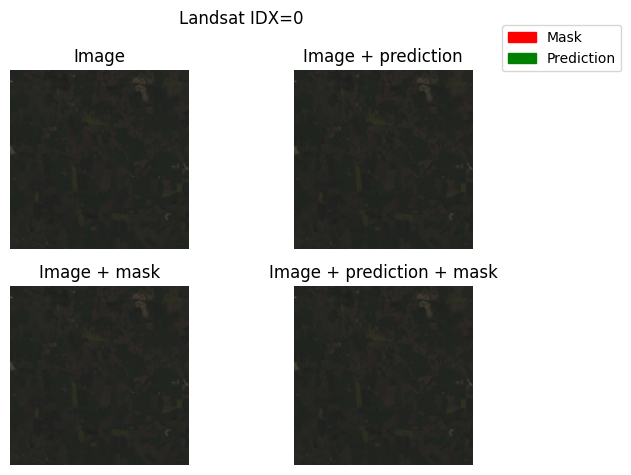

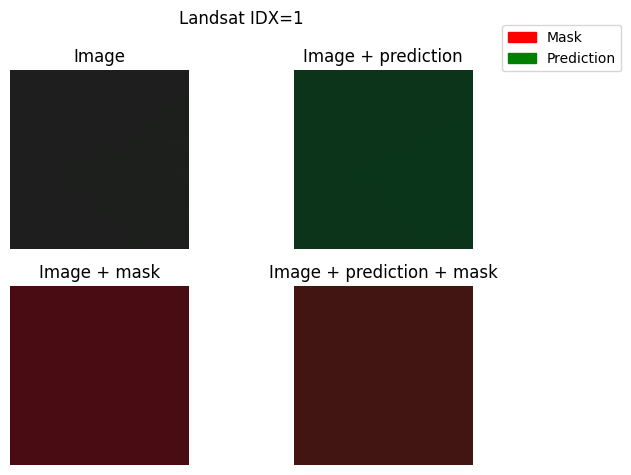

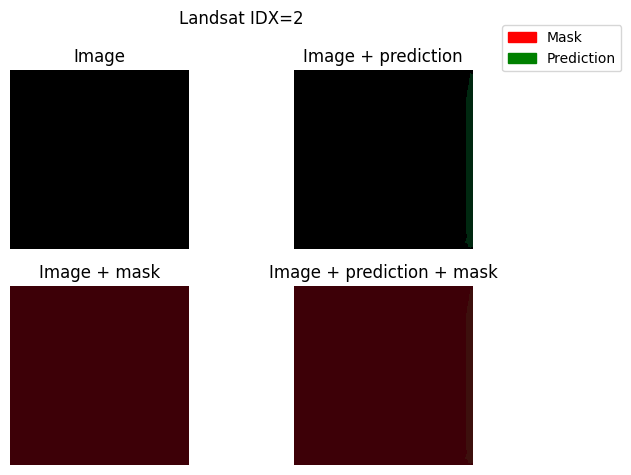

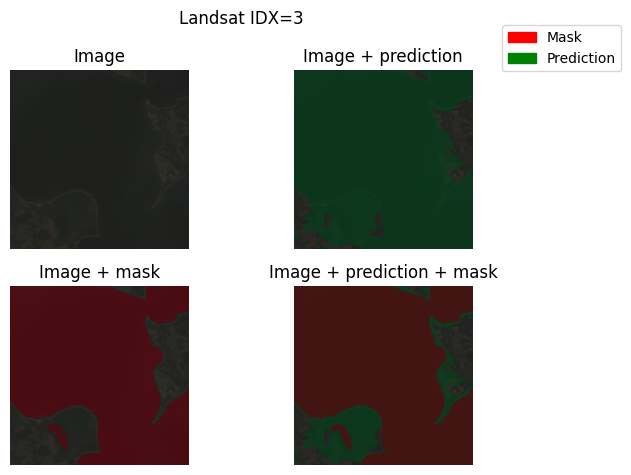

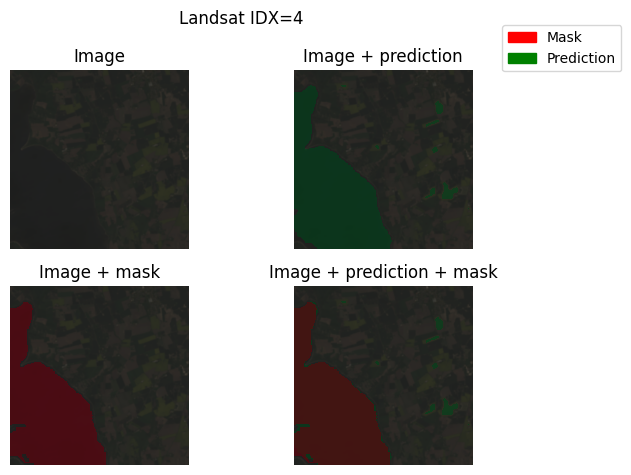

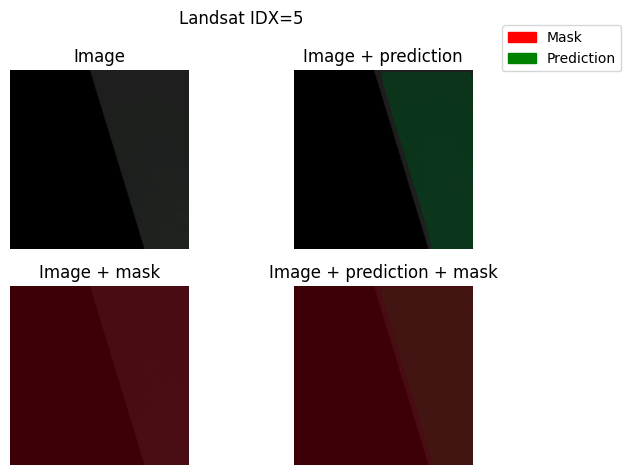

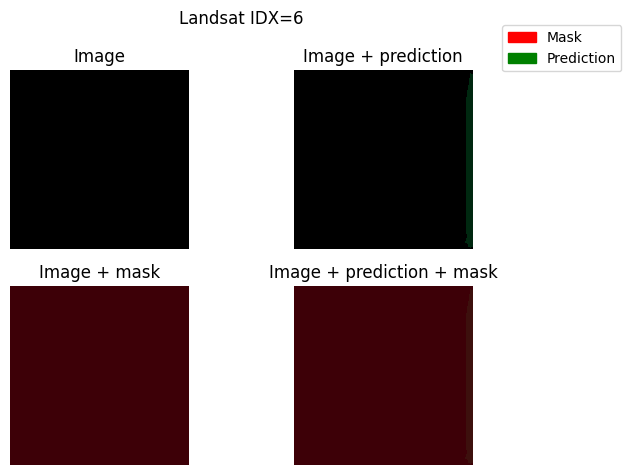

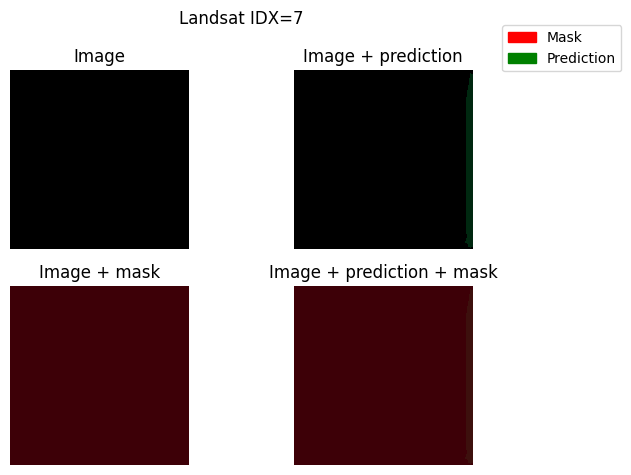

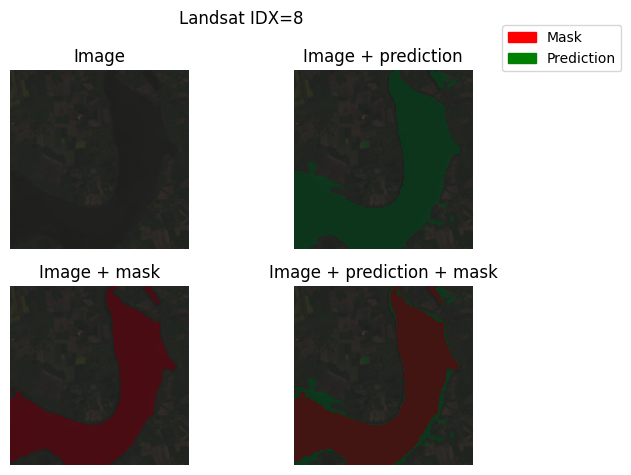

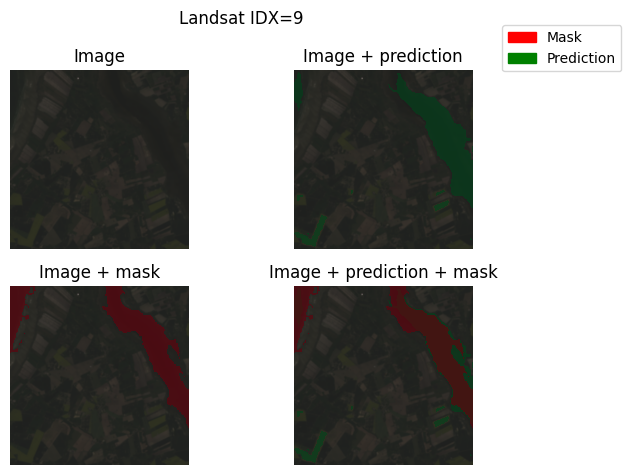

In [6]:
plot_predictions(images_, masks_, preds_, 'Landsat')

### Results with all available channels (R, G, B, NIR, SWIR1, SWIR2)

In [7]:
model_ckpt = './networks/2024_05_01-10_54_41_encoder_efficientnet-b0_weights_imagenet_epochs_100_batchsize_16_lr_0.001/model_0.19832_val_avg.pt'
model, channels = get_model(model_ckpt)

Model parameters:
{'epochs': 100, 'batch_size': 16, 'lr': 0.001, 'encoder': 'efficientnet-b0', 'weights': 'imagenet', 'model_ckpt_path': './networks', 'data_path': '../data_prepped', 'channels': 'r.g.b.nir.swir1.swir2'}


In [8]:
# Get the test dataset
data_path = '../denmark_landsat_data'
image_path = data_path + '/{}/img/*'
mask_path = data_path + '/{}/msk/*'
 
# Use custom data loaders for the dataset
test_dataset = CustomDataLoader(image_path.format('test'), mask_path.format('test'), channels = channels)
test_loader = DataLoader(dataset = test_dataset, batch_size = 8, shuffle = False, num_workers = 8)

In [9]:
images, masks, preds = evaluate_model(test_loader, model, thresholds = [0.01, 0.05, 0.1, 0.2, 0.4, 0.8])

100%|█████████████████████████████████████████████████████████████████████████████████| 119/119 [00:14<00:00,  8.27it/s]


0.01 {'iou': 0.9851, 'recall': 0.9908, 'precision': 0.9942, 'acc': 0.988, 'F1': 0.9925, 'kappa': 0.9618}


100%|█████████████████████████████████████████████████████████████████████████████████| 119/119 [00:14<00:00,  8.35it/s]


0.05 {'iou': 0.7855, 'recall': 0.7895, 'precision': 0.9936, 'acc': 0.8264, 'F1': 0.8799, 'kappa': 0.5814}


100%|█████████████████████████████████████████████████████████████████████████████████| 119/119 [00:14<00:00,  8.35it/s]


0.1 {'iou': 0.6845, 'recall': 0.6877, 'precision': 0.9934, 'acc': 0.7448, 'F1': 0.8127, 'kappa': 0.4512}


100%|█████████████████████████████████████████████████████████████████████████████████| 119/119 [00:13<00:00,  8.54it/s]


0.2 {'iou': 0.6303, 'recall': 0.6328, 'precision': 0.9937, 'acc': 0.7011, 'F1': 0.7732, 'kappa': 0.3928}


100%|█████████████████████████████████████████████████████████████████████████████████| 119/119 [00:14<00:00,  8.07it/s]


0.4 {'iou': 0.5928, 'recall': 0.5947, 'precision': 0.9946, 'acc': 0.6711, 'F1': 0.7443, 'kappa': 0.3567}


100%|█████████████████████████████████████████████████████████████████████████████████| 119/119 [00:14<00:00,  8.34it/s]


0.8 {'iou': 0.5636, 'recall': 0.5651, 'precision': 0.9953, 'acc': 0.6477, 'F1': 0.7209, 'kappa': 0.3304}
